In [12]:
#Import packages

import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from Dense import Dense
from Activations import Tanh
from Losses import mse, mse_prime
from Network import train, predict
from Visualize import visualize_network


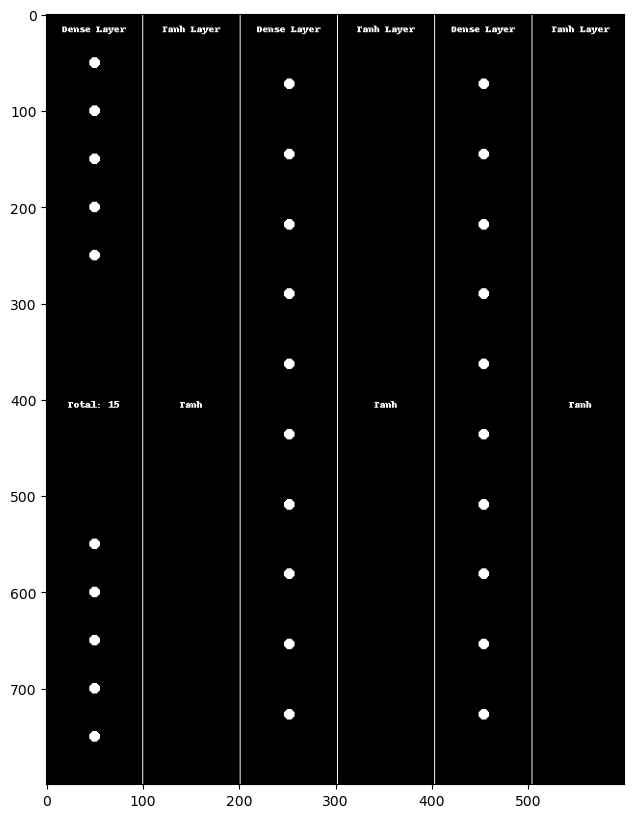

In [13]:
def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 6000)
x_test, y_test = preprocess_data(x_test, y_test, 1000)

# neural network
network = [
    Dense(28 * 28, 15, regularization=0.01),
    Tanh(),
    Dense(15, 10, regularization=0.01),
    Tanh(),
    Dense(10, 10, regularization=0.01),
    Tanh()
]
network_image = visualize_network(network)

#Show the network big picture
plt.figure(figsize=(10,10))
plt.imshow(network_image) #Q. how to make the picture bigger? A. use plt.figure(figsize=(20,20))



In [14]:

# train
costs = train(network, mse, mse_prime, x_train, y_train, epochs=20, batch_size = 6, learning_rate=0.01)


1/20, error=0.7773066116093765
2/20, error=0.6430775833388431
3/20, error=0.43222433491995593
4/20, error=0.2120193295019917
5/20, error=0.11504649305935463
6/20, error=0.09184195184271152
7/20, error=0.08604608307351339
8/20, error=0.0840778900172861
9/20, error=0.08346247736794979
10/20, error=0.08343309141284397
11/20, error=0.08368039445189908
12/20, error=0.08406777688767386
13/20, error=0.08452088049190251
14/20, error=0.08499469238709569
15/20, error=0.08546345793532881
16/20, error=0.08591097947089035
17/20, error=0.08632591773988824
18/20, error=0.08670167711339351
19/20, error=0.0870354013056946
20/20, error=0.08732585388128974


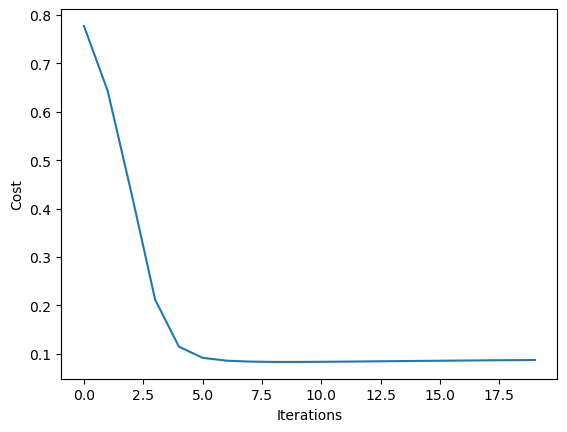

error: 0.08761333886412771
pred: 1 	true: 7
pred: 0 	true: 2
pred: 1 	true: 1
pred: 0 	true: 0
pred: 6 	true: 4
pred: 1 	true: 1
pred: 9 	true: 4
pred: 9 	true: 9
pred: 0 	true: 5
pred: 9 	true: 9
pred: 0 	true: 0
pred: 0 	true: 6
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 1
pred: 0 	true: 5
pred: 9 	true: 9
pred: 7 	true: 7
pred: 3 	true: 3
pred: 9 	true: 4
pred: 9 	true: 9
pred: 6 	true: 6
pred: 1 	true: 6
pred: 0 	true: 5
pred: 1 	true: 4
pred: 0 	true: 0
pred: 1 	true: 7
pred: 9 	true: 4
pred: 0 	true: 0
pred: 1 	true: 1
pred: 1 	true: 3
pred: 1 	true: 1
pred: 1 	true: 3
pred: 0 	true: 4
pred: 1 	true: 7
pred: 0 	true: 2
pred: 9 	true: 7
pred: 1 	true: 1
pred: 0 	true: 2
pred: 1 	true: 1
pred: 1 	true: 1
pred: 1 	true: 7
pred: 9 	true: 4
pred: 1 	true: 2
pred: 1 	true: 3
pred: 0 	true: 5
pred: 1 	true: 1
pred: 1 	true: 2
pred: 9 	true: 4
pred: 9 	true: 4
pred: 7 	true: 6
pred: 6 	true: 3
pred: 0 	true: 5
pred: 0 	true: 5
pred: 1 	true: 6
pred: 0 	true: 0
pred: 9 	true: 4
pred

In [15]:

# plot costs
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# calculate error on test set
error = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    error += mse(y, output)
error /= len(x_test)
print("error:", error)


# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))
